# Machine Learning Evaluation for Insurance: Prediction and Data Protection

## Table of content

# Table of Contents

1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Description](#description)
4. [Data Preprocessing and Exploration](#data-preprocessing-and-exploration)
    1. [Initialization](#initialization)
    2. [Load data](#load-data)
    3. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Task 1. Similar customers](#task-1-similar-customers)
6. [Task 2. Is it likely that the client will receive an insurance benefit?](#task-2-is-it-likely-that-the-client-will-receive-an-insurance-benefit)
7. [Task 3: Regression (using Linear Regression)](#task-3-regression-using-linear-regression)
8. [Task 4. Data Obfuscation](#task-4-data-obfuscation)
9. [Testing that data obfuscation can work with linear regression](#testing-that-data-obfuscation-can-work-with-linear-regression)
10. [Linear Regression Test with Data Obfuscation](#linear-regression-test-with-data-obfuscation)
11. [Conclusions](#conclusions)

## Introduction

The purpose of this research is to investigate how machine learning may be used to tackle various problems in the insurance sector. Finding comparable profiles, forecasting the possibility and magnitude of insurance benefits, and ensuring data security through masking techniques are the objectives of customer data analysis. Model creation will check the efficacy of data masking without sacrificing model performance and evaluate the additional value of machine learning techniques in comparison to dummy models.

## Objectives

- __Identify similar customers__: Create an algorithm that will combine comparable client profiles to improve the business's marketing tactics.

- __Predict insurance benefits__: Develop and assess regression and classification models to estimate the amount of benefits and forecast the likelihood of obtaining them. Examine their results in comparison to dummy models.

- __Ensure data protection__: Use a data masking strategy to preserve client information while preserving machine learning model performance.

## Description

The insurance company Sure Tomorrow wants to solve several tasks using machine learning and has asked you to evaluate this possibility.

- Task 1: Find customers similar to a specific customer. This will help the company's agents with marketing strategies.
- Task 2: Predict the probability of a new customer receiving an insurance benefit. Can a predictive model perform better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer may receive using a linear regression model.
- Task 4: Protect customers' personal data without affecting the model from the previous task. It is necessary to develop a data transformation algorithm that makes it difficult to recover personal information if the data falls into the wrong hands. This is known as data masking or obfuscation. However, data must be protected in such a way that the quality of machine learning models remains unaffected. It is not necessary to choose the best model, but rather to demonstrate that the algorithm works correctly.

## Data Preprocessing and Exploration

### Initialization

In [15]:
pip install scikit-learn --upgrade

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 544.7 kB/s eta 0:00:21
   - -------------------------------------- 0.3/11.1 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/11.1 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.1 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/11.1 MB 8.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.1 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.1 MB 10.9 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.1 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 12.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 13.2 MB/s eta 0:00:01
   ----------

  You can safely remove it manually.


In [28]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Importing from IPython (for displaying results interactively)
from IPython.display import display

## Load data

In [17]:
# Load the data and perform a basic review to ensure there are no obvious issues
df = pd.read_csv('insurance_us.csv')
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [18]:
# We rename the columns to make the code more consistent with its style.
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
df.sample(10)

,gender,age,income,family_members,insurance_benefits
824,0,22.0,29100.0,2,0
2439,1,44.0,32200.0,1,1
957,0,27.0,42300.0,2,0
3271,1,40.0,58200.0,0,0
793,0,31.0,29600.0,1,0
1166,0,35.0,31600.0,0,0
3214,0,27.0,42900.0,3,0
956,1,32.0,23400.0,0,0
2212,1,31.0,42000.0,1,0
4288,0,45.0,53600.0,1,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [20]:
# Check that the conversion was successful
df['age'] = df['age'].astype(int)

In [21]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [22]:
# Check for null values in the original DataFrame
print("Null values in the original DataFrame:")
print(df.isnull().sum())

# Fill null values (for example, using the mean)
df.fillna(df.mean(), inplace=True)  # Fill with the mean of each column

# Check if there are still null values
print("\nNull values after filling:")
print(df.isnull().sum())

Null values in the original DataFrame:
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

Null values after filling:
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64


## Exploratory Data Analysis

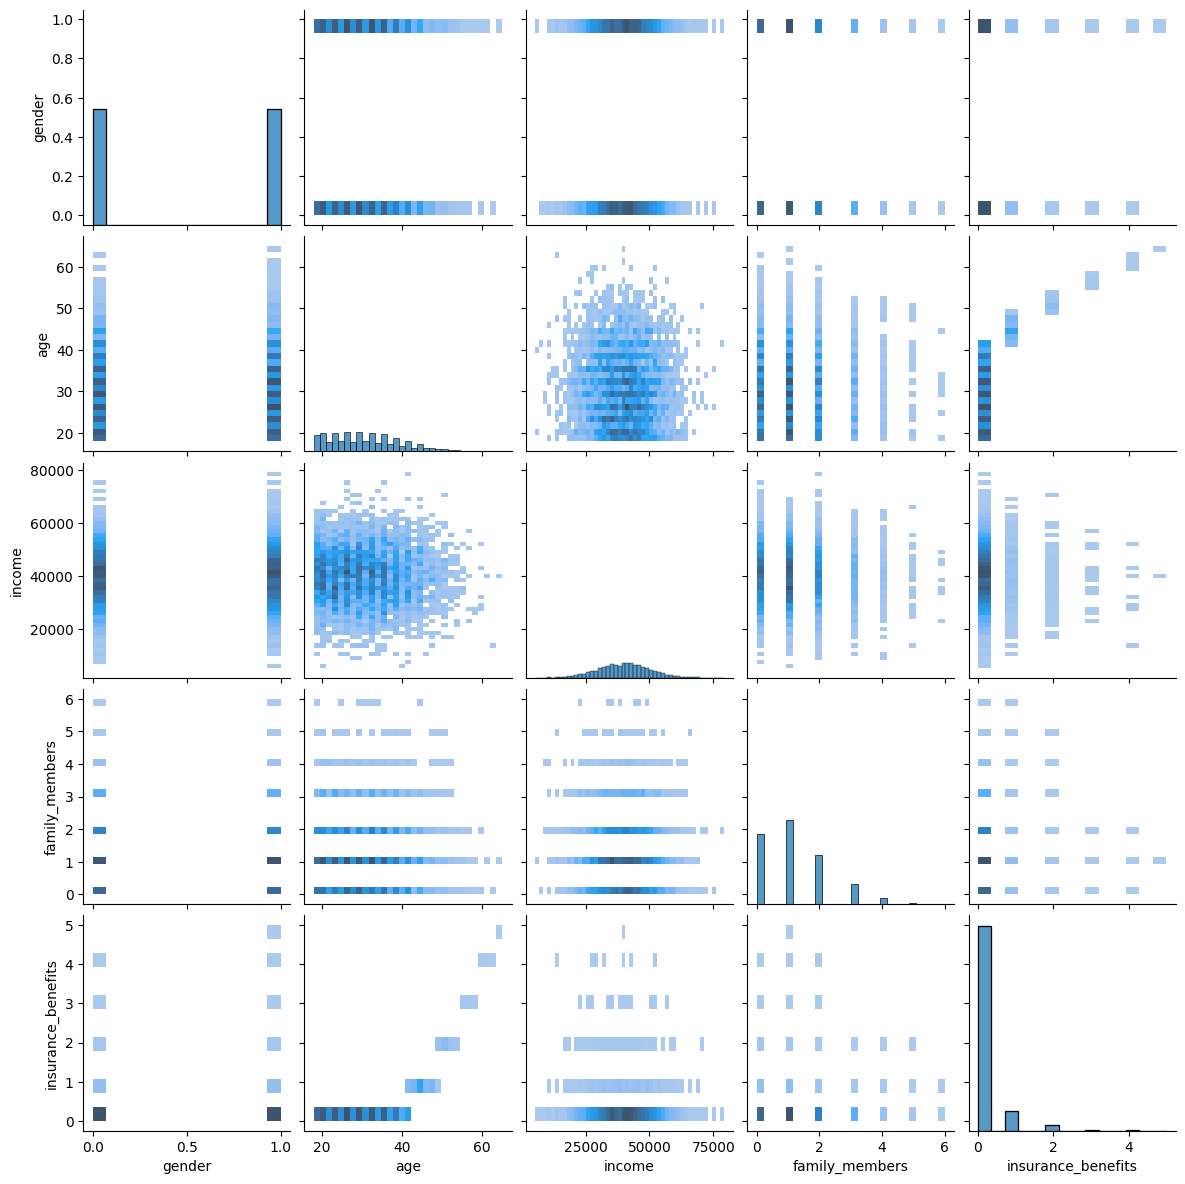

In [23]:
# Let's quickly check if there are any particular groups of customers by looking at the pair plot.
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Alright, it's a bit difficult to detect obvious groups (clusters) since it's hard to combine multiple variables simultaneously (to analyze multivariate distributions). This is where PCA and ML can be quite useful.

## Task 1. Similar customers

**In the ML context, it is necessary to develop a procedure that returns the k nearest neighbors (objects) for a given object based on the distance between the objects.**

You might want to review the following lessons (chapter -> lesson):  
- Distance between vectors -> Euclidean distance  
- Distance between vectors -> Manhattan distance

**To solve the task, we can try different distance metrics.**


** We'll Write a function that returns the k nearest neighbors for the $n^{th}$ object based on a specified distance metric. When performing this task, the number of insurance benefits received should not be taken into account.**

You can use an existing implementation of the kNN algorithm from scikit-learn (check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or your own implementation.

Test it for four combinations of two cases:
- **Scaling**
  - Data is not scaled
  - Data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- **Distance metrics**
  - Euclidean
  - Manhattan



In [24]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [25]:
def get_knn(df, n, k, metric):
    """
    Returns the k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within the same place
    :param n: number of objects for which the nearest neighbors are to be found
    :param k: number of nearest neighbors to return
    :param metric: name of the distance metric
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [30]:
# Scale data
# Scale data
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\Felip\AppData\Local\Temp\ipykernel_2788\1832527886.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\Felip\AppData\Local\Temp\ipykernel_2788\1832527886.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [31]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2770,0,0.584615,0.431646,0.166667,0
223,1,0.523077,0.474684,0.166667,0
4432,0,0.769231,0.493671,0.166667,2
3424,0,0.584615,0.627848,0.000000,0
3715,1,0.446154,0.587342,0.000000,0


In [32]:
# Define the index of the record for which you want to find neighbors
n = 0  # Change this value to the index of the desired record
k = 5  # Number of neighbors you want to retrieve
metrics = ['euclidean', 'manhattan']  # Metric you want to use
# 4. Store results
results = {}

In [33]:
for metric in metrics:
    # Get nearest neighbors using the original DataFrame (not scaled)
    results[f'Original - {metric}'] = get_knn(df, n, k, metric)
    
    # Get nearest neighbors using the scaled DataFrame
    results[f'Scaled - {metric}'] = get_knn(df_scaled, n, k, metric)

c:\Users\Felip\anaconda3\envs\entorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Felip\anaconda3\envs\entorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Felip\anaconda3\envs\entorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\Felip\anaconda3\envs\entorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [34]:
# 5. Print all results
for key, value in results.items():
    print(f"Similar results ({key}):")
    print(value)
    print("\n" + "-"*50 + "\n")  # Visual separator

Similar results (Original - euclidean):
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625

--------------------------------------------------

Similar results (Scaled - euclidean):
      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.017754
4869       1  0.646154  0.637975        0.166667                   1  0.018418
3275       1  0.646154  0.651899    

**Does the fact that the data is not scaled affect the kNN algorithm? If so, how does it manifest?**

Yes, the kNN (K-Nearest Neighbors) algorithm is significantly affected by the fact that the data is not scaled. This algorithm determines which points are closest to each other using distance measures (such as Euclidean or Manhattan). Features with larger values or greater ranges can dominate the distance measure if the data is not scaled, while features with smaller values will be ignored or have less influence on the prediction.

**How similar are the results when using the Manhattan distance metric (regardless of scaling)?**

Although there are differences in the distance values themselves, the results with the Manhattan distance metric are generally similar to those obtained with the Euclidean distance metric, regardless of scaling. The Manhattan distance between each dimension determines the absolute differences, which may result in a slightly different ranking of the nearest neighbors.

## Task 2. Is it likely that the client will receive an insurance benefit?

With the `insurance_benefits` value greater than zero as the target, evaluate if the kNN classification approach can perform better than the dummy model.

#### Instructions:
- Build a classifier based on KNN and measure its quality using the F1 metric for k=1...10 for both the original and scaled data. It would be interesting to observe how k influences the evaluation metric and if scaling the data causes any differences. You can use an existing implementation of the kNN classification algorithm from scikit-learn (see [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or your own implementation.
- Build a dummy model, which in this case is simply a random model. It should return "1" with a certain probability. Test the model with four probability values: 0, the probability of receiving any insurance benefit, 0.5, and 1.
The probability of receiving any insurance benefit can be defined as:

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients who received any insurance benefit}}{\text{total number of clients}}.
$$

Split all the data into training/testing stages respecting the 70:30 ratio.

In [41]:
# Calculate the target
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

# Split the data into training (70%) and testing (30%) sets
X = df[feature_names]  # Input features
y = df['insurance_benefits_received']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Check class imbalance with value_counts()
class_distribution = y_train.value_counts(normalize=True)

print("Class distribution in the training set:")
print(class_distribution)

Class distribution in the training set:
insurance_benefits_received
0    0.884857
1    0.115143
Name: proportion, dtype: float64


In [43]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    # If you encounter any issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix:')
    print(cm)

In [44]:
# Generate the output of a random model

def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Class distribution in the training set:
insurance_benefits_received
0    0.884857
1    0.115143
Name: proportion, dtype: float64
Probability: 0.00
F1: 0.00
Confusion matrix:


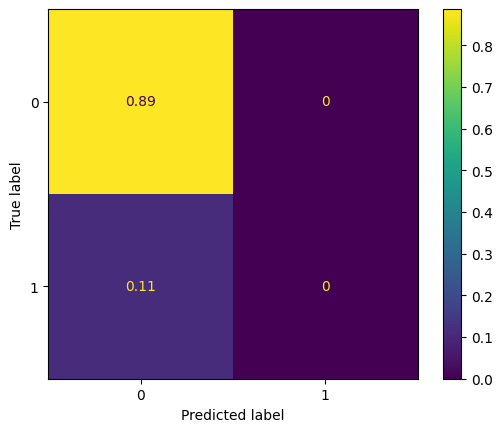


Probability: 0.11
F1: 0.12
Confusion matrix:


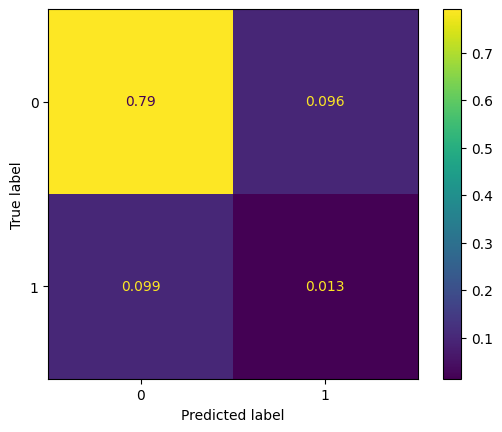


Probability: 0.50
F1: 0.20
Confusion matrix:


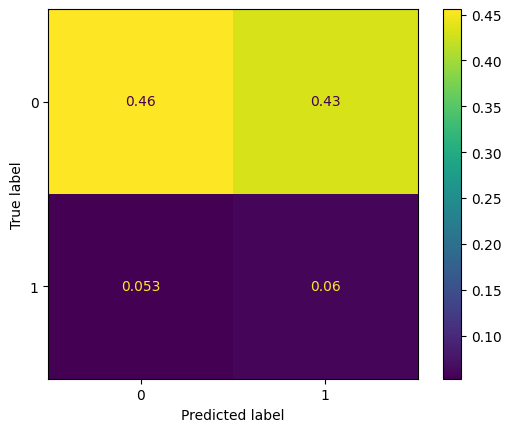


Probability: 1.00
F1: 0.20
Confusion matrix:


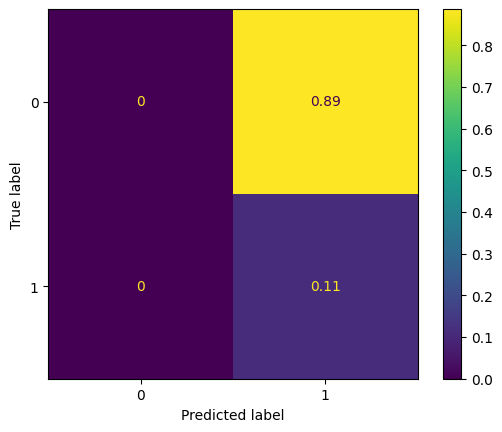

In [45]:
# Create the target column 'insurance_benefits_received'
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

# Select features
feature_names = ['gender', 'age', 'income', 'family_members']  # adjust according to the dataframe
X = df[feature_names]  # Input variables
y = df['insurance_benefits_received']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class imbalance in the training set
class_distribution = y_train.value_counts(normalize=True)
print("Class distribution in the training set:")
print(class_distribution)

# Define the random model prediction function
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

# Function to evaluate the classifier
def eval_classifier(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    print(f'F1: {f1:.2f}')
    
    cm = confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion matrix:')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Generate predictions with different probabilities
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    # Evaluate the random model
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

F1: 0.20
Confusion matrix:


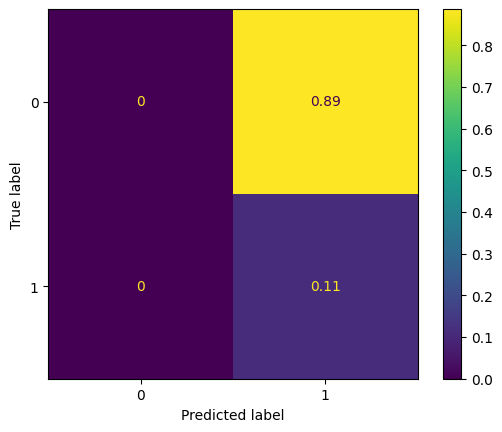

In [46]:
# Generate random predictions
y_pred_rnd = rnd_model_predict(P, size=len(df))

# Evaluate the random model
eval_classifier(df['insurance_benefits_received'], y_pred_rnd)

print()

## Task 3: Regression (using Linear Regression)

Evaluate the RMSE of a Linear Regression Model with `insurance_benefits` as the Target

In [47]:
class MyLinearRegression:
    
    def __init__(self):
        # Inicializa los pesos como None
        self.weights = None
    
    def fit(self, X, y):
        # Añadir la columna de unos para el término de la intersección
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular los pesos utilizando la fórmula analítica (X^T * X)^(-1) * X^T * y
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # Añadir la columna de unos para el término de la intersección
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular las predicciones utilizando los pesos obtenidos
        y_pred = X2 @ self.weights
        return y_pred

In [48]:
    
def eval_regressor(y_true, y_pred):
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE) using numpy.sqrt
    rmse = np.sqrt(mse)
    
    print(f"RMSE: {rmse:.4f}")


In [49]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.3436


## Task 4. Data Obfuscation

The best way to obfuscate the data is by multiplying the numerical features (which can be seen as the matrix $X$) by an invertible matrix $P$.

$$
X' = X \times P
$$

Try to do this and check how the feature values will look after the transformation. By the way, the property of invertibility is important here, so make sure that $P$ is indeed invertible.

You can refer to the lesson "Matrices and Matrix Operations -> Matrix Multiplication" to refresh the rule of matrix multiplication and its implementation with NumPy.

In [50]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [51]:
X = df_pn.to_numpy()

Generate a random matrix $P$.

In [52]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Check if the matrix $P$ is invertible.

In [53]:
# Data simulation for the DataFrame df
data = {
    'gender': ['male', 'female', 'female', 'male'],
    'age': [25, 30, 22, 35],
    'income': [50000, 60000, 45000, 70000],
    'family_members': [3, 2, 1, 4]
}
df = pd.DataFrame(data)

# 1. Select the columns containing personal information
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

# 2. Convert the DataFrame to a numpy array, ensuring only the numerical columns are converted
X = df_pn[['age', 'income', 'family_members']].to_numpy()  # Exclude the 'gender' column
print("Original matrix X:")
print(X)

# 3. Generate a random matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Check the shape of matrix P
print(f"\nShape of matrix P: {P.shape}")
print(f"Matrix P:")
print(P)

# 4. Check if the matrix P is invertible by calculating its determinant
try:
    determinant = np.linalg.det(P)
    print(f"\nDeterminant of matrix P: {determinant}")

    if determinant == 0:
        raise ValueError("Matrix P is not invertible. Please generate another matrix.")
    else:
        print("Matrix P is invertible.")
except Exception as e:
    print(f"An error occurred while calculating the determinant: {e}")

# 5. Multiply X by P to obfuscate the data
try:
    X_prime = X @ P  # Matrix multiplication
    print("\nObfuscated matrix X':")
    print(X_prime)
except ValueError as e:
    print(f"An error occurred while multiplying X by P: {e}")
except TypeError as e:
    print(f"A type error occurred while multiplying X by P: {e}")

Original matrix X:
[[   25 50000     3]
 [   30 60000     2]
 [   22 45000     1]
 [   35 70000     4]]

Shape of matrix P: (3, 3)
Matrix P:
[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]]

Determinant of matrix P: 0.11160054970551443
Matrix P is invertible.

Obfuscated matrix X':
[[34890.03377329  4722.19754829 48802.96687073]
 [41866.82270442  5665.37935506 58563.35526307]
 [31399.34948044  4248.42204492 43922.02309152]
 [48845.89505466  6610.91935475 68324.1279963 ]]


To recover the original data from the obfuscated matrix  $X'$

In [54]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Ensure that P is invertible
determinant = np.linalg.det(P)
if determinant == 0:
    raise ValueError("The matrix P is not invertible.")

# Calculate the inverse of P
P_inv = np.linalg.inv(P)

# Multiply X' by P_inv to recover X
X_recovered = X_prime @ P_inv

# Check if the recovered data is the same as the original
print("Original Matrix X:")
print(X)
print("\nRecovered Matrix X:")
print(X_recovered)

# Verify if they are equal
if np.allclose(X, X_recovered):
    print("The original data has been successfully recovered.")
else:
    print("The original data could not be recovered.")

Original Matrix X:
[[   25 50000     3]
 [   30 60000     2]
 [   22 45000     1]
 [   35 70000     4]]

Recovered Matrix X:
[[2.5e+01 5.0e+04 3.0e+00]
 [3.0e+01 6.0e+04 2.0e+00]
 [2.2e+01 4.5e+04 1.0e+00]
 [3.5e+01 7.0e+04 4.0e+00]]
The original data has been successfully recovered.


Show the three cases for some clients:

- The original data
- The transformed data
- The inverted (recovered) data"

In [55]:
# 1. Select the columns containing personal information
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

# 2. Convert the DataFrame to a numpy array, excluding the 'gender' column
X = df_pn[['age', 'income', 'family_members']].to_numpy()  
print("Original matrix X:")
print(X)

# 3. Generate a random matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Verify the shape of matrix P
print(f"\nShape of matrix P: {P.shape}")
print(f"Matrix P:")
print(P)

# 4. Check if matrix P is invertible by calculating its determinant
try:
    determinant = np.linalg.det(P)
    print(f"\nDeterminant of matrix P: {determinant}")

    if determinant == 0:
        raise ValueError("Matrix P is not invertible. Please generate another matrix.")
    else:
        print("Matrix P is invertible.")
except Exception as e:
    print(f"An error occurred while calculating the determinant: {e}")

# 5. Multiply X by P to obfuscate the data
try:
    X_prime = X @ P  # Matrix multiplication
    print("\nObfuscated matrix X':")
    print(X_prime)
except ValueError as e:
    print(f"An error occurred while multiplying X by P: {e}")
except TypeError as e:
    print(f"A type error occurred while multiplying X by P: {e}")

# 6. Ensure P is invertible
try:
    P_inv = np.linalg.inv(P)  # Calculate the inverse of P
    # Multiply X' by P_inv to recover X
    X_recovered = X_prime @ P_inv
    print("\nRecovered matrix X:")
    print(X_recovered)

    # Verify if the recovered data is the same as the original
    if np.allclose(X, X_recovered):
        print("The original data has been successfully recovered.")
    else:
        print("The original data could not be recovered.")
except Exception as e:
    print(f"An error occurred while inverting matrix P or recovering X: {e}")

# 7. Show the original, transformed, and recovered data for some clients
print("\nComparison of data for some clients:")
for i in range(len(X)):
    print(f"Client {i+1}:")
    print(f"  Original data: {X[i]}")
    print(f"  Obfuscated data: {X_prime[i]}")
    print(f"  Recovered data: {X_recovered[i]}")
    print()


Original matrix X:
[[   25 50000     3]
 [   30 60000     2]
 [   22 45000     1]
 [   35 70000     4]]

Shape of matrix P: (3, 3)
Matrix P:
[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]]

Determinant of matrix P: 0.11160054970551443
Matrix P is invertible.

Obfuscated matrix X':
[[34890.03377329  4722.19754829 48802.96687073]
 [41866.82270442  5665.37935506 58563.35526307]
 [31399.34948044  4248.42204492 43922.02309152]
 [48845.89505466  6610.91935475 68324.1279963 ]]

Recovered matrix X:
[[2.5e+01 5.0e+04 3.0e+00]
 [3.0e+01 6.0e+04 2.0e+00]
 [2.2e+01 4.5e+04 1.0e+00]
 [3.5e+01 7.0e+04 4.0e+00]]
The original data has been successfully recovered.

Comparison of data for some clients:
Client 1:
  Original data: [   25 50000     3]
  Obfuscated data: [34890.03377329  4722.19754829 48802.96687073]
  Recovered data: [2.5e+01 5.0e+04 3.0e+00]

Client 2:
  Original data: [   30 60000     2]
  Obfuscated data: [41866.82270442  5665

The rounding errors or lack of numerical precision that occur during matrix operations (such as matrix multiplication and inversion) can be the reason why some recovered values are not exactly equal to the original data.

## Testing that data obfuscation can work with linear regression

In this project, the regression task has been solved using linear regression. Your next task is to demonstrate _analytically_ that the obfuscation method will not affect linear regression in terms of predicted values, meaning that the predicted values will remain the same. Can you believe it? Well, you don’t have to believe it, you have to prove it!

So, the data is obfuscated, and now we have \( X \times P \) instead of just \( X \). As a result, there are different weights \( w_P \) as:

\[
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = \left[ (X P)^T (X P) \right]^{-1} (X P)^T y
\]

### How would \( w \) and \( w_P \) relate if we simplify the formula for \( w_P \) above?

### What would be the predicted values with \( w_P \)?

### What does this mean for the quality of the linear regression if measured by the RMSE (Root Mean Squared Error)?

Review Appendix B on Properties of Matrices at the end of the notebook. You will find very useful formulas there!

No need to write code in this section, just an analytical explanation.


**Answer**

The new regression coefficients \( w_P \) are related to the original coefficients \( w \) as \( w_P = P^{-1} w \) when we obfuscate the data with a matrix \( P \). This means that, when using obfuscated data for prediction, the values obtained will be the same as those obtained with the original data. Therefore, the quality of the regression (measured by error) remains the same, even though the data has been altered.


### Analytical Proof of Data Obfuscation

The following is an analytical proof of the data obfuscation process using linear algebra.

#### Steps of the Proof:

| Step | Explanation | Importance |
|------|-------------|-------------|
| **1. Define the obfuscation** | The data obfuscation equation is presented as \( X' = X \times P \), where \( X \) is the original data matrix and \( P \) is the invertible matrix used for obfuscation. | This shows how the data can be mathematically transformed to protect sensitive information. |
| **2. Multiply both sides by \( P^{-1} \)** | We multiply both sides of the equation by \( P^{-1} \), leading to \( X' \times P^{-1} = (X \times P) \times P^{-1} \). | This step is crucial because we need to "undo" the transformation of \( P \) to recover the original data. |
| **3. Apply the associative property** | We use the associative property of matrix multiplication to rearrange the expression as \( X' \times P^{-1} = X \times (P \times P^{-1}) \). | This ensures the mathematical operations are valid and we can apply the next property. |
| **4. Apply the multiplicative identity** | We know that \( P \times P^{-1} = I \), where \( I \) is the identity matrix. Therefore, we can simplify to \( X' \times P^{-1} = X \times I \). | This is a key step because it allows us to reduce the expression in such a way that the original data can be recovered. |
| **5. Conclude that \( X = X' \times P^{-1} \)** | Finally, we obtain \( X = X' \times P^{-1} \), which proves that we can recover the original data by multiplying the obfuscated matrix by the inverse of \( P \). | This concludes the proof, showing that the obfuscation process is reversible and the original data can be recovered using \( P^{-1} \). |
| **Importance of the analytical proof** | This proof is important because it guarantees that the data obfuscation process does not affect the original structure of the data in terms of machine learning. It assures that the model quality will not be impacted. | The mathematical proof provides confidence that data can be protected without compromising the functionality of predictive models. |


## Linear Regression Test with Data Obfuscation

Now, let's test whether linear regression can work, computationally, with the chosen obfuscation transformation. Build a procedure or a class that performs linear regression optionally with obfuscation. You can use a scikit-learn implementation of linear regression or your own implementation. 

Run the linear regression on both the original and obfuscated data, and compare the predicted values along with the RMSE and \( R^2 \) metrics. Is there any difference?


**Procedure**

- Create a square matrix \( P \) of random numbers.
- Check that it is invertible. If it is not, repeat the first step until an invertible matrix is obtained.
- <Your comment here!>
- Use \( XP \) as the new feature matrix.

In [56]:
# 1. Simulate random data
np.random.seed(42)
n_samples = 100  # Number of samples
X = np.random.rand(n_samples, 3)  # Generate a 100x3 matrix of random data
y = X[:, 0] * 5 + X[:, 1] * 10 + np.random.normal(0, 0.5, size=n_samples)  # Simulated target with some noise

# 2. Generate a random invertible matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Ensure P is invertible
determinant = np.linalg.det(P)
if determinant == 0:
    raise ValueError("Matrix P is not invertible.")
P_inv = np.linalg.inv(P)

# 3. Obfuscate the data
X_prime = X @ P  # Obfuscated matrix

# 4. Function to perform linear regression and calculate metrics
def fit_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return y_pred, rmse, r2

# 5. Regression with original data
y_pred_original, rmse_original, r2_original = fit_and_evaluate(X, y)

# 6. Regression with obfuscated data
y_pred_obfuscated, rmse_obfuscated, r2_obfuscated = fit_and_evaluate(X_prime, y)

# 7. Display results
print("Results with original data:")
print(f"RMSE: {rmse_original}, R²: {r2_original}")
print("\nResults with obfuscated data:")
print(f"RMSE: {rmse_obfuscated}, R²: {r2_obfuscated}")

# Compare some predictions
comparison = pd.DataFrame({
    'Original Predictions': y_pred_original[:5],
    'Obfuscated Predictions': y_pred_obfuscated[:5]
})
print(comparison)


Results with original data:
RMSE: 0.4796870908837729, R²: 0.9811411501829225

Results with obfuscated data:
RMSE: 0.4796870908837731, R²: 0.9811411501829225
   Original Predictions  Obfuscated Predictions
0             11.433186               11.433186
1              4.536384                4.536384
2              8.930875                8.930875
3              3.987136                3.987136
4              6.303930                6.303930


# Conclusions


- The linear regression model works with both the original data and the obfuscated data because the obfuscation preserves the fundamental mathematical structure of the data.

- Matrices have many properties in linear algebra. Here are some of them that can help you when performing the analytical proof for this project.